In [87]:
from google.cloud import storage

def download_file(bucket_name = 'train_data_solar_project',
                              blob_name = 'X_train_copernicus.npz', 
                              download_to_disk = False, 
                              destination_file_name = '../raw_data/data.npz'):
    
    """Download a file from Google Cloud Storage. 
    If download_to_disk = False then it will save to memory.  
    If download_to_disk = True then it will save to your local disk.
    """
    
    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)

    blob = bucket.blob(blob_name)
    
    if download_to_disk == True:
        
        blob.download_to_filename(destination_file_name)
        print(
            "Downloaded storage object {} from bucket {} to local file {}.".format(
            blob_name, bucket_name, destination_file_name
        )
    )

    if download_to_disk == False:

        contents = blob.download_as_string()

        print("Downloaded storage object {} from bucket {} as the following string: {}.".format(
            blob_name, bucket_name, contents
        )
    )
        
    return 'Download complete.'

In [88]:
import numpy as np
import datetime

def number_of_observations(actual_day):
    
    '''Takes a date and returns the number of observations taken that day.'''
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()

    d1 = datetime.date(2012,1,1)
    d2 = datetime.date(2012,2,20)
    d3 = datetime.date(2012,4,12)
    d4 = datetime.date(2012,8,28)
    d5 = datetime.date(2012,10,20)
    d6 = datetime.date(2012,12,31)
    
    obs = 0
    
    if dx>=d1 and dx<=d2:
        obs=4    
    elif dx>d2 and dx<=d3:
        obs=5
    elif dx>d3 and dx<=d4:
        obs=6
    elif dx>d4 and dx<=d5:
        obs=5
    elif dx>d5 and dx<=d6:
        obs=4

    if obs!=0:
        return (f"The number of observation per day is {obs}.")
    else:
        return ("The date out of range.")

In [89]:
number_of_observations('21-06-2012')

'The number of observation per day is 6.'

In [90]:
def date_index(actual_day):
    
    '''Takes a date and returns the list of relevant indices in the data.'''
    
    data = np.load('../raw_data/baseline.npz', allow_pickle = True) # Figure out to make this a python script
    riv = data['datetime']
    date_format = []
    
    for i in range(riv.shape[0]):
        date_format.append(riv[i].date()) 
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()
   
    index = []
    
    for i in range(riv.shape[0]):
        if dx == date_format[i]:
            index.append(i)
    
    if not index:
        return ("The date out of range.")
    else:
        return index

In [91]:
import matplotlib.pyplot as plt

def one_day_evolution(
    feature = 'CLS',
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of selected feature over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    selected_feature = data[feature]
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in selected_feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    plt.figure (figsize = (100,20))
    
    if feature == 'CLS':
        for j in range(4):
            for i in range(8):
                plt.subplot(4, 8, j * 8 + i + 1)
                plt.imshow(selected_feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    elif feature == 'GHI':
        for j in range(4):
            for i in range(4):
                plt.subplot(4, 8, j * 8 + i + 1)
                plt.imshow(selected_feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
        
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {selected_feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


The radiation on 21-01-2012 was 17287873.970000003 W/m².


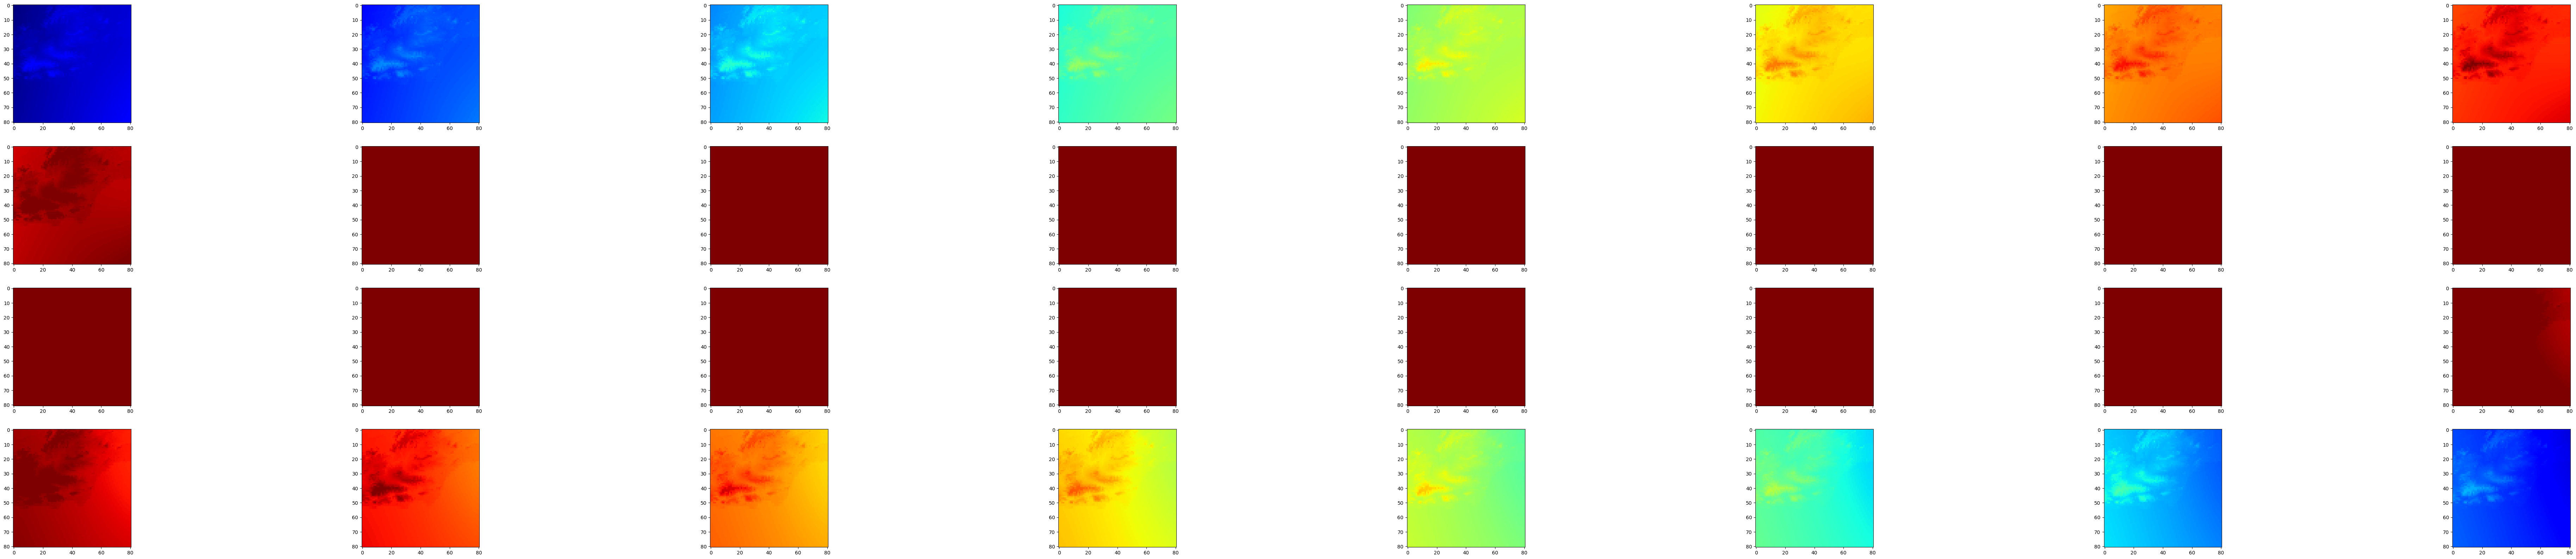

In [92]:
one_day_evolution('CLS', '21-01-2012')

The radiation on 21-01-2012 was 10036833.0 W/m².


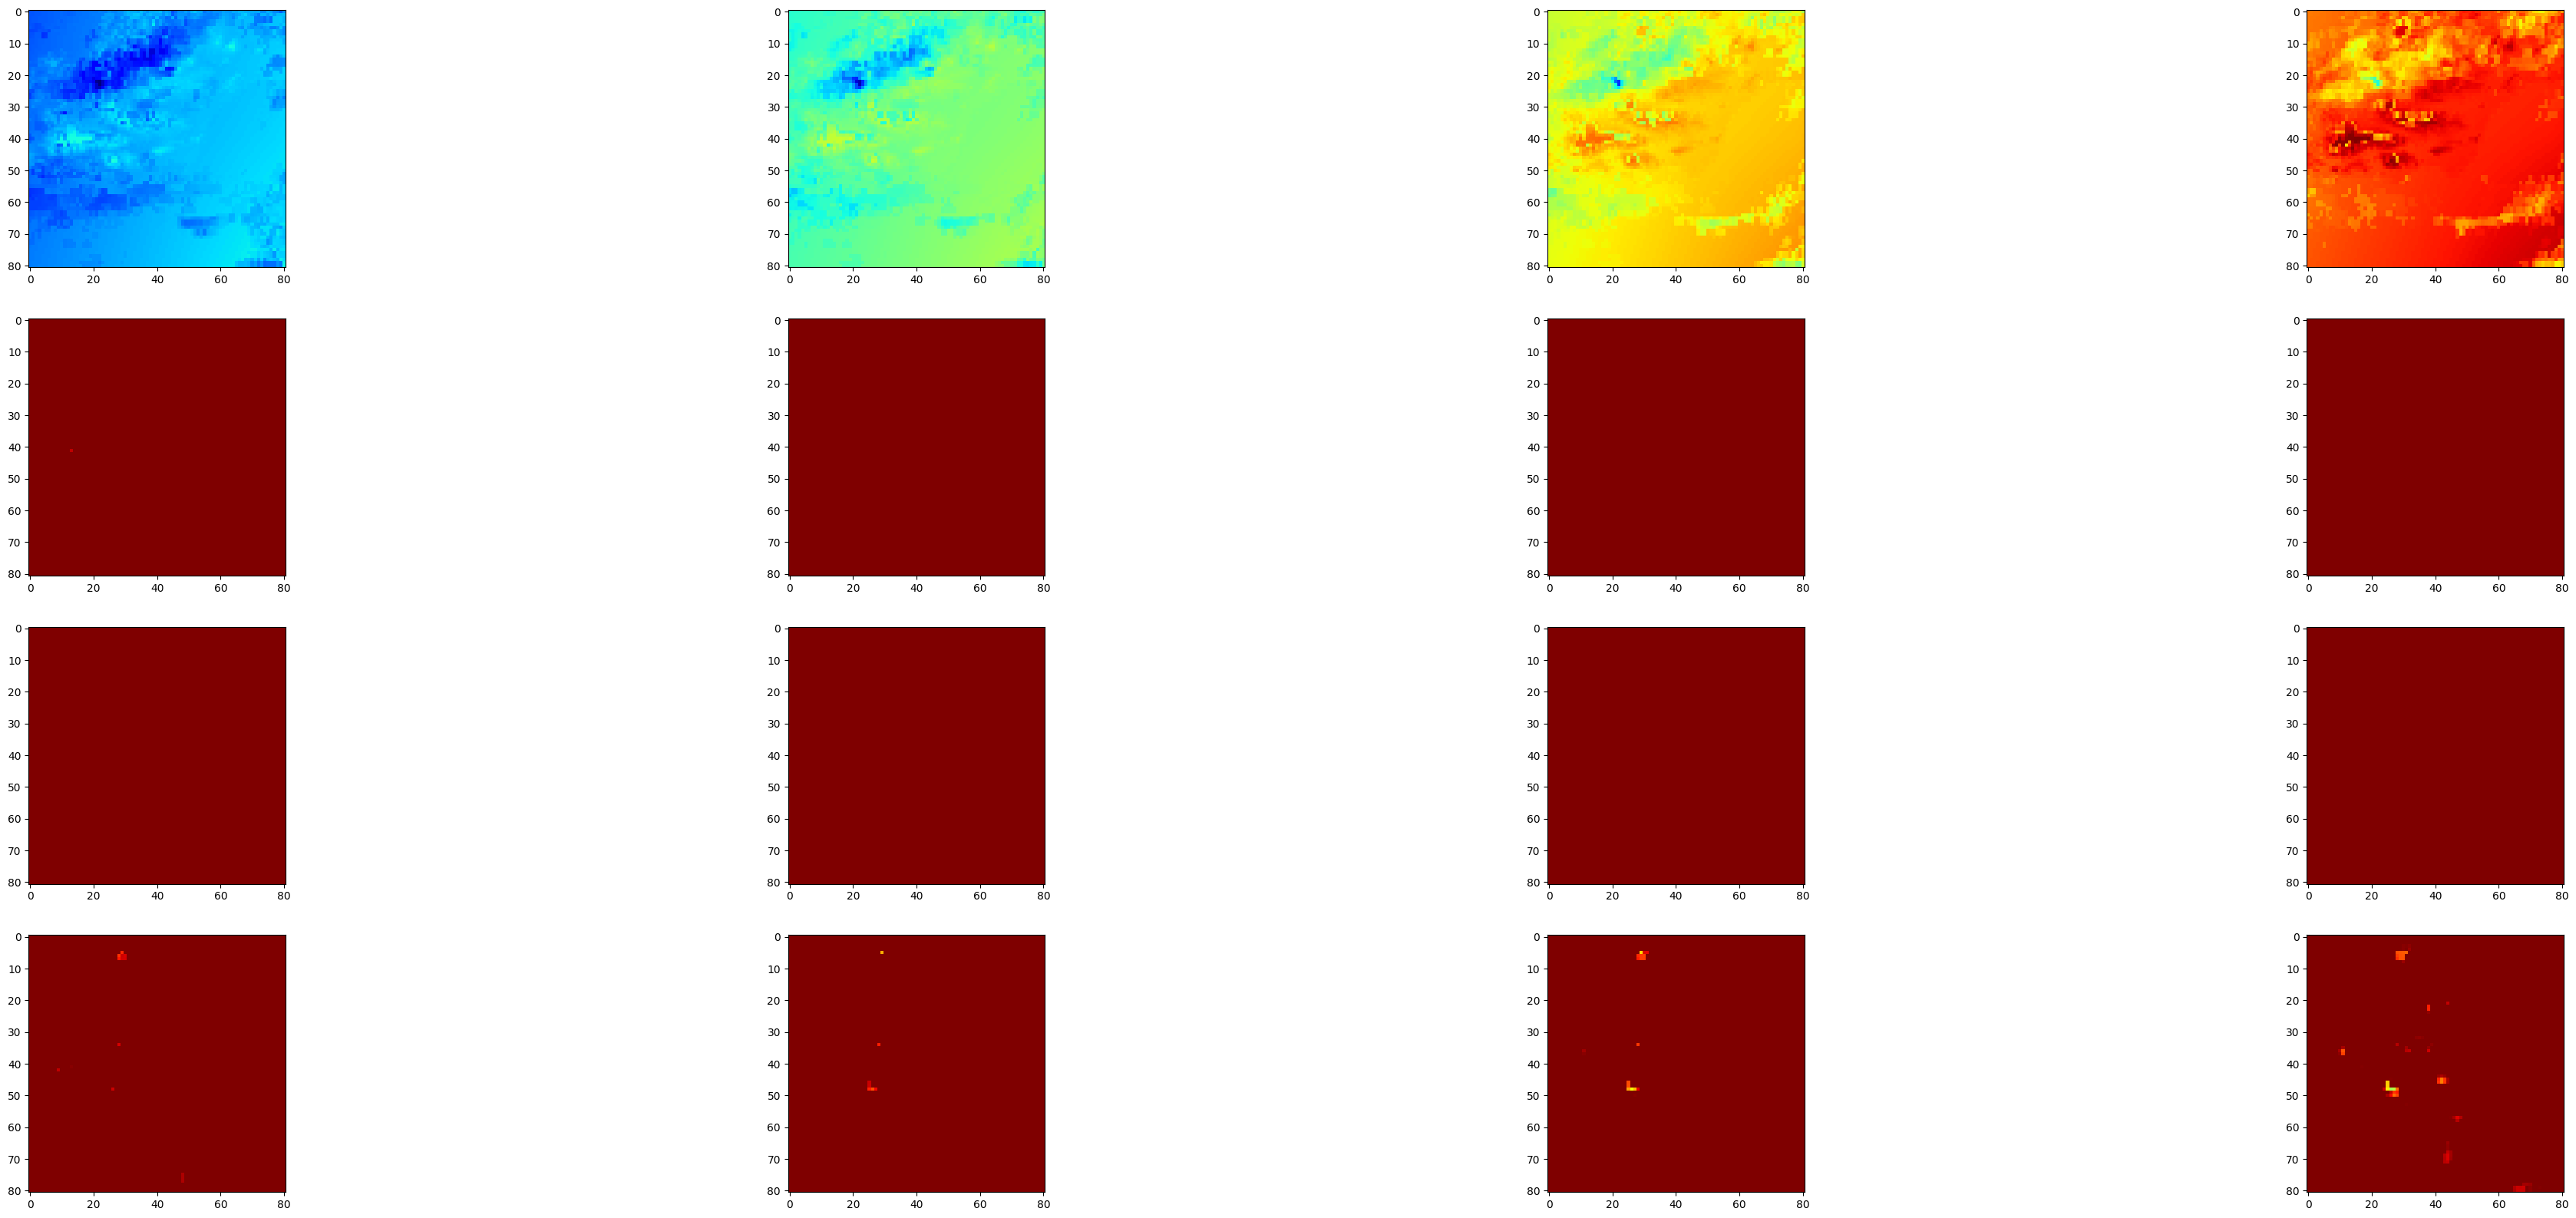

In [85]:
one_day_evolution('GHI', '21-01-2012')

In [77]:
import matplotlib.pyplot as plt

def one_day_cls_evolution(
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of CLS over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    feature = data['CLS']
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    plt.figure (figsize = (100,20))
    
    for j in range(4):
        for i in range(8):
            plt.subplot(4, 8, j * 8 + i + 1)
            plt.imshow(feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


The radiation on 21-01-2012 was 17287873.970000003 W/m².


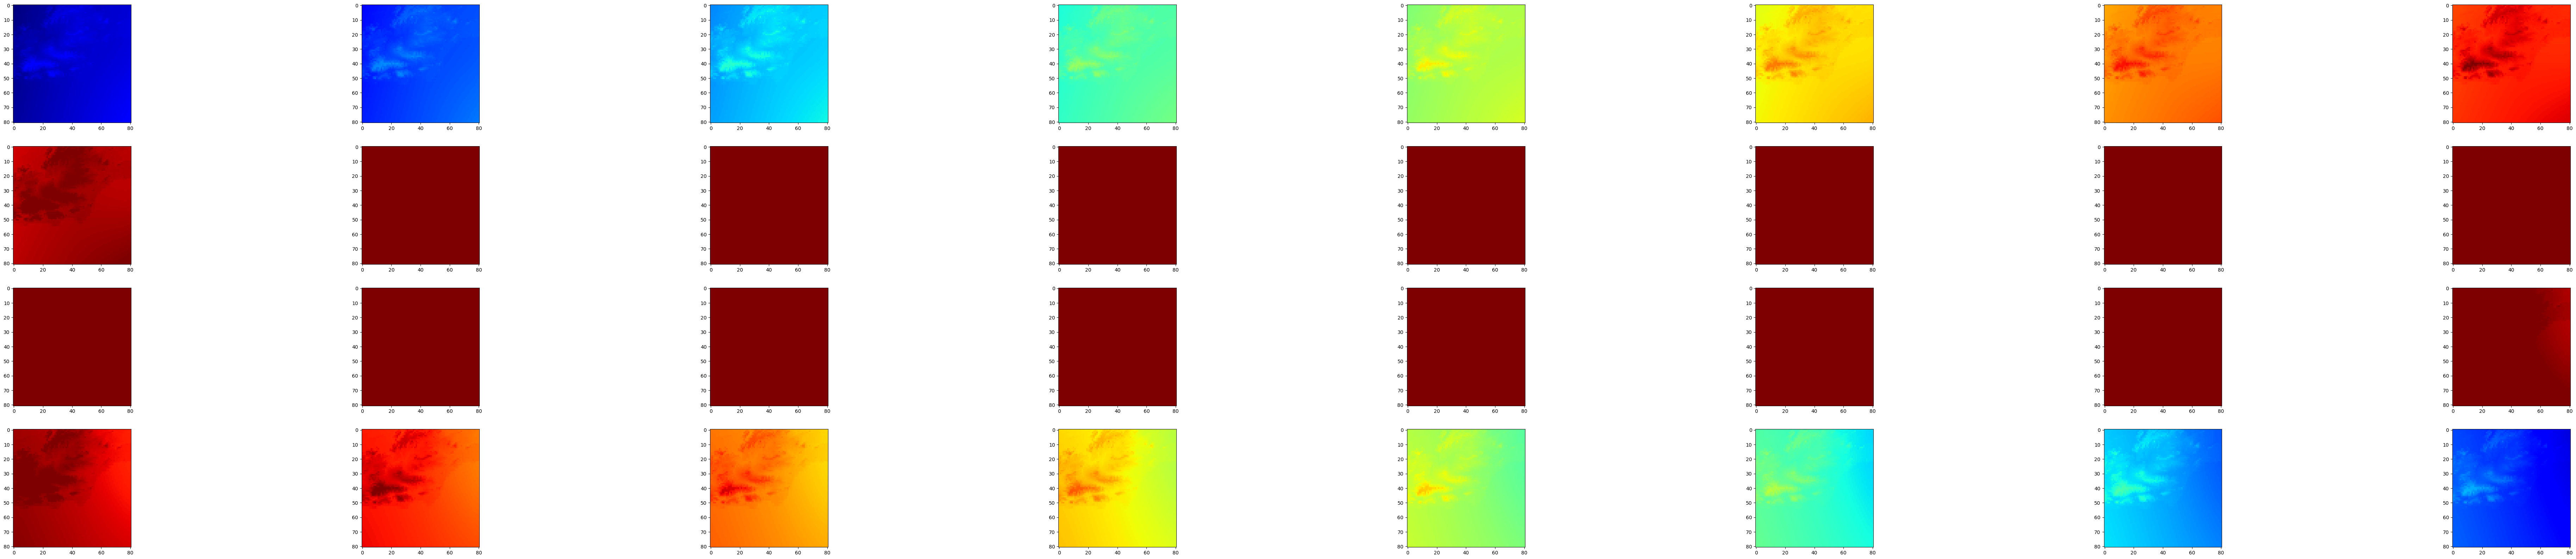

In [78]:
one_day_cls_evolution('21-01-2012')

In [79]:
import matplotlib.pyplot as plt

def one_day_ghi_evolution(
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of the GHI over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    feature = data['GHI']
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    plt.figure (figsize = (100,20))
    
    for j in range(4):
        for i in range(4):
            plt.subplot(4, 8, j * 8 + i + 1)
            plt.imshow(feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


The radiation on 21-04-2012 was 22632322.53 W/m².


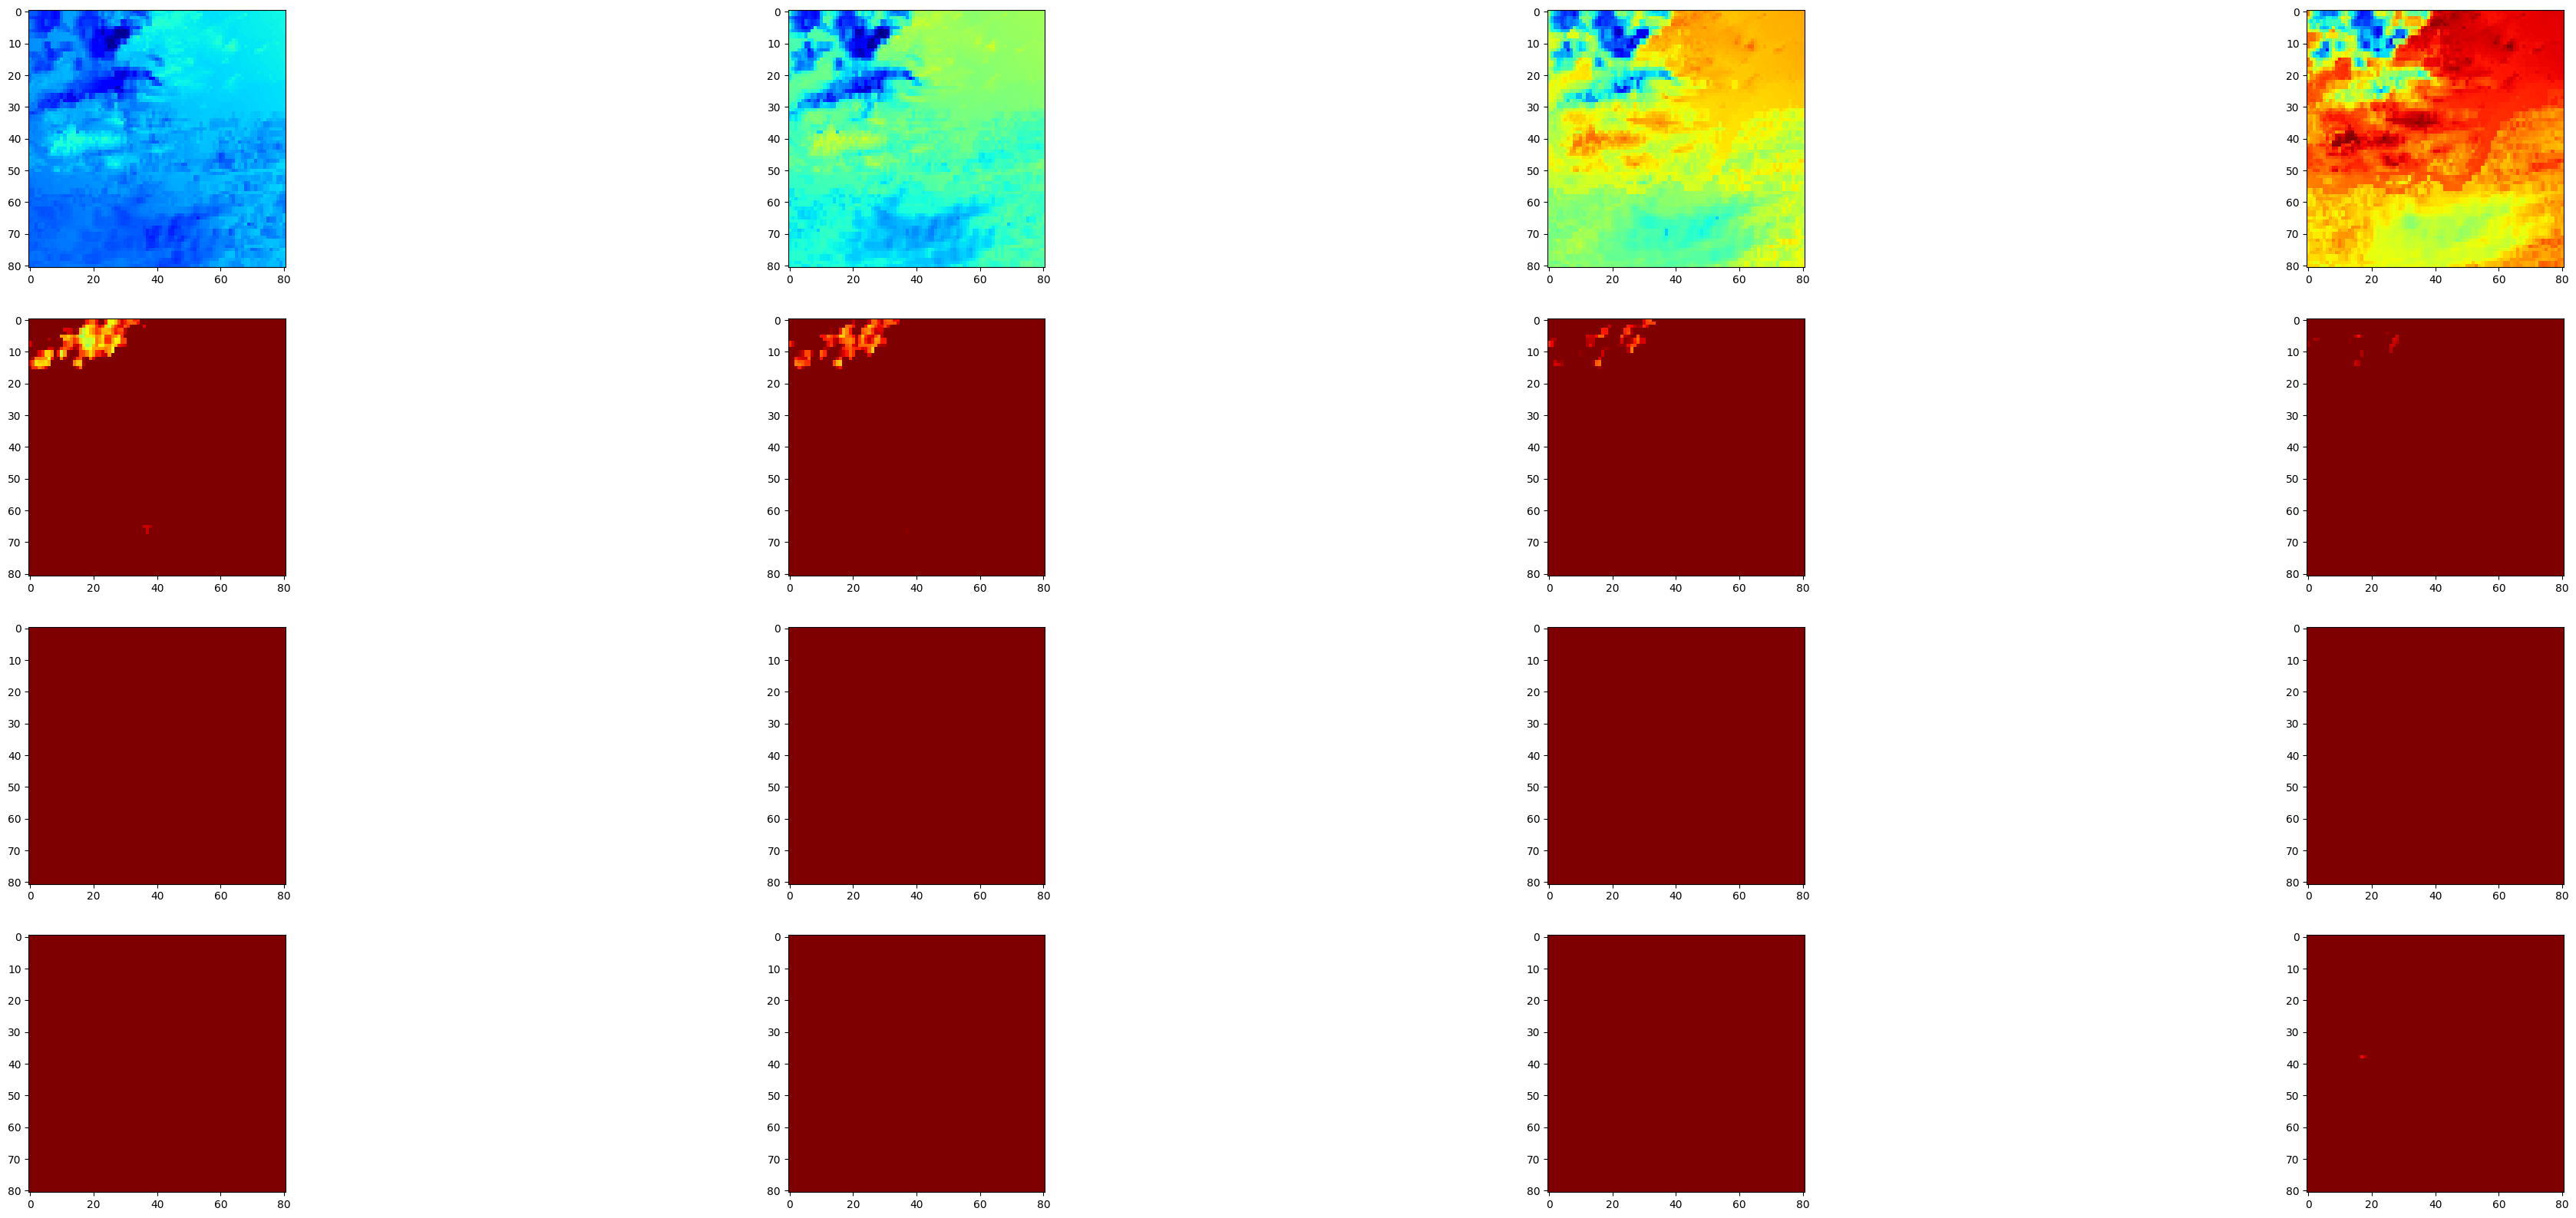

In [81]:
one_day_ghi_evolution('21-04-2012')

In [105]:
def cls_matrix_value(date = '21-06-2012'):
    '''Takes a date and returns CLS curve during that day. It also returns minimum and maximum matrix values.'''
    
    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    feature = data['CLS']
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    # plt.figure (figsize = (100,20))
    
    # for j in range(4):
    #     for i in range(8):
    #         plt.subplot(4, 8, j * 8 + i + 1)
    #         plt.imshow(feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    # for i in range(len(index)):
    #     print(index)
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {feature[index, :, :, :].sum()} W/m\u00b2.')

